<a href="https://colab.research.google.com/github/akshaykhadse/DigitalCognitionBook/blob/code/01_linear_regression/02_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overfitting

## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

## Generate data
Let's generate dataset for a sin signal wih random noise

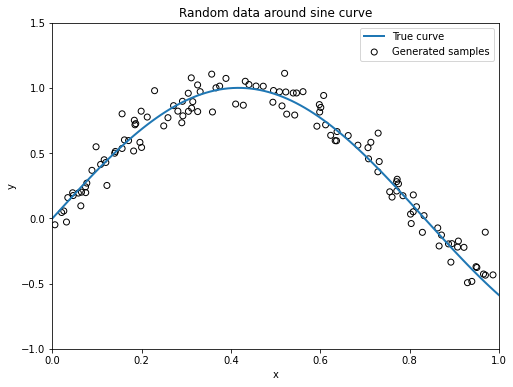

In [2]:
nSamples = 120

# Set the random seed for reproducible results
np.random.seed(42)

# "True" generating function representing a process in real life
def trueFunction(x):
    y = np.sin(1.2 * x * np.pi) 
    return(y)

# x values and y value with a small amount of random noise
x = np.sort(np.random.rand(nSamples))
y = trueFunction(x) + 0.1 * np.random.randn(len(x))

# Random indices for creating training and testing sets
idx = np.random.choice(list(range(nSamples)), size = nSamples, replace=False)
xData = x[idx]
yData = y[idx]

plt.figure(figsize=(8, 6))
plt.scatter(
    xData,
    yData,
    marker="o",
    edgecolor='black',
    facecolors='none'
)

trueX = np.linspace(0, 1, 100)
trueY = trueFunction(trueX)
plt.plot(
    trueX,
    trueY,
    linewidth=2
)

plt.ylim(-1, 1.5); plt.xlim(0, 1)
plt.xlabel("x");
plt.ylabel("y");
plt.legend(["True curve","Generated samples"]);
plt.title("Random data around sine curve");

Let's randomly split the data into train and test set such that 80% samples end up in train set and 20% in test set.

In [3]:
xTrain = xData[:int(0.7 * len(x))].reshape(-1,1)
xTest  = xData[int(0.7 * len(x)):].reshape(-1,1)

yTrain = yData[:int(0.7 * len(y))].reshape(-1,1)
yTest = yData[int(0.7 * len(y)):].reshape(-1,1)

## Modelling
Let's try to fit a polynomial to train data of degrees 5 and 25. 

Degree = 5
Train Error = 0.0087
Test Error  = 0.0095
Degree = 25
Train Error = 0.0067
Test Error  = 0.019


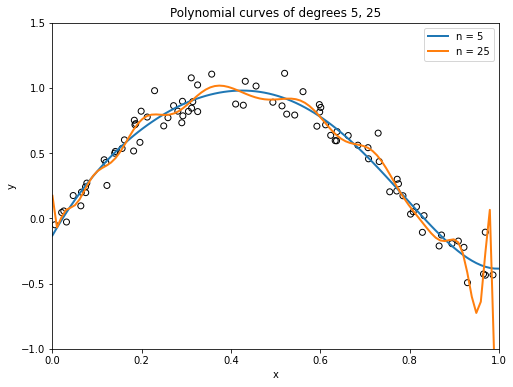

In [4]:
degrees = [5, 25]

plt.figure(figsize=(8, 6))
plt.scatter(
    xTrain,
    yTrain,
    marker="o",
    edgecolor='black',
    facecolors='none'
)

for polynomialDegree in degrees:
    polynomialFeatures= PolynomialFeatures(polynomialDegree, include_bias=False)
    polynomialX = polynomialFeatures.fit_transform(xTrain)

    reg = LinearRegression()
    reg.fit(polynomialX, yTrain)

    trainPredictions = reg.predict(polynomialX)
    testPredictions = reg.predict(polynomialFeatures.fit_transform(xTest))

    trainError = mean_squared_error(yTrain, trainPredictions)
    testError = mean_squared_error(yTest, testPredictions)

    print("Degree = {:}".format(polynomialDegree))
    print("Train Error = {:.2}".format(trainError))
    print("Test Error  = {:.2}".format(testError))

    xCurve = np.linspace(0, 1, 100).reshape((-1,1))
    yCurve = reg.predict(polynomialFeatures.fit_transform(xCurve))

    plt.plot(
        xCurve,
        yCurve,
        linewidth=2
    )

plt.ylim(-1, 1.5); plt.xlim(0, 1)
plt.xlabel("x");
plt.ylabel("y");
plt.legend(['n = 5', 'n = 25']);
plt.title("Polynomial curves of degrees 5, 25");

## Degrees of polynomial
Lets repeat the above for different degrees of polynomial

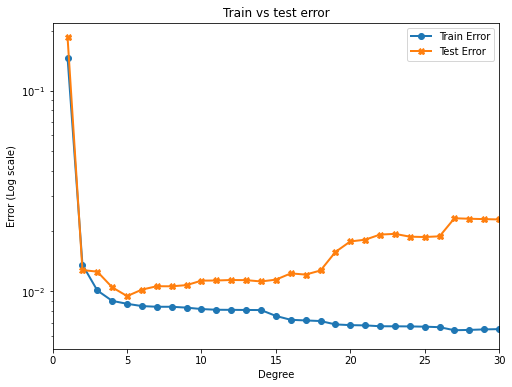

In [5]:
max_degrees = 40
degrees = [int(x) for x in np.linspace(1, max_degrees, max_degrees)]

trainErrors = np.zeros(max_degrees)
testErrors = np.zeros(max_degrees)
for polynomialDegree in degrees:
    polynomialFeatures= PolynomialFeatures(polynomialDegree, include_bias=False)
    polynomialX = polynomialFeatures.fit_transform(xTrain)

    reg = LinearRegression()
    reg.fit(polynomialX, yTrain)

    trainPredictions = reg.predict(polynomialX)
    testPredictions = reg.predict(polynomialFeatures.fit_transform(xTest))

    trainErrors[polynomialDegree-1] = mean_squared_error(yTrain, trainPredictions)
    testErrors[polynomialDegree-1] = mean_squared_error(yTest, testPredictions)

plt.figure(figsize=(8, 6))
plt.plot(
    degrees,
    trainErrors,
    marker="o",
    c='tab:blue',
    linewidth=2
)

plt.plot(
    degrees,
    testErrors,
    marker="X",
    c='tab:orange',
    linewidth=2
)

plt.xlim(0, 30);
plt.xlabel("Degree")
plt.ylabel("Error (Log scale)")
plt.yscale("log")
plt.legend(['Train Error', 'Test Error']);
plt.title("Train vs test error");

Observe that the train error and test error both decrease till degree = 5. This is underfitting. Thereafter, train error decreases wheras the test error increases. This is overfitting.

## References
* https://towardsdatascience.com/polynomial-regression-bbe8b9d97491
* https://github.com/WillKoehrsen/Data-Analysis/blob/master/over_vs_under/Over%20vs%20Under%20Fitting%20Example.ipynb